In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [14]:
df.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


<AxesSubplot:>

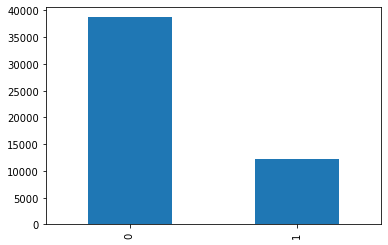

In [9]:
df['Response'].value_counts().plot.bar()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [11]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [12]:
df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [13]:
df['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [16]:
#sns.pairplot(df)

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

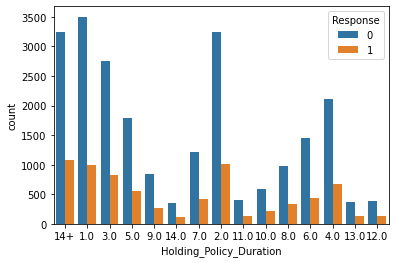

In [20]:
sns.countplot(x = 'Holding_Policy_Duration',hue ='Response',  data=df)

In [30]:
df.select_dtypes(include='object').columns

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'],
      dtype='object')

In [39]:
replace_dict={0:'no',1:'yes'}

In [40]:
df['Response'] = df['Response'].replace(replace_dict)

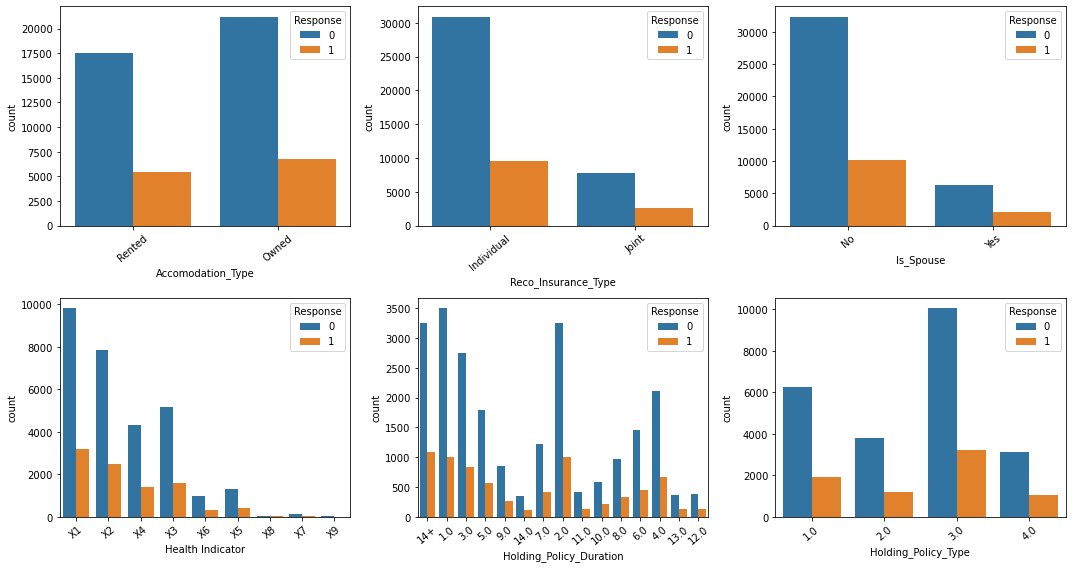

In [57]:
var = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration','Holding_Policy_Type']
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax = ax.flatten()

for i, cat in enumerate(var):
    
    sns.countplot(x = cat, hue ='Response', data=df, ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=40 )

plt.tight_layout()


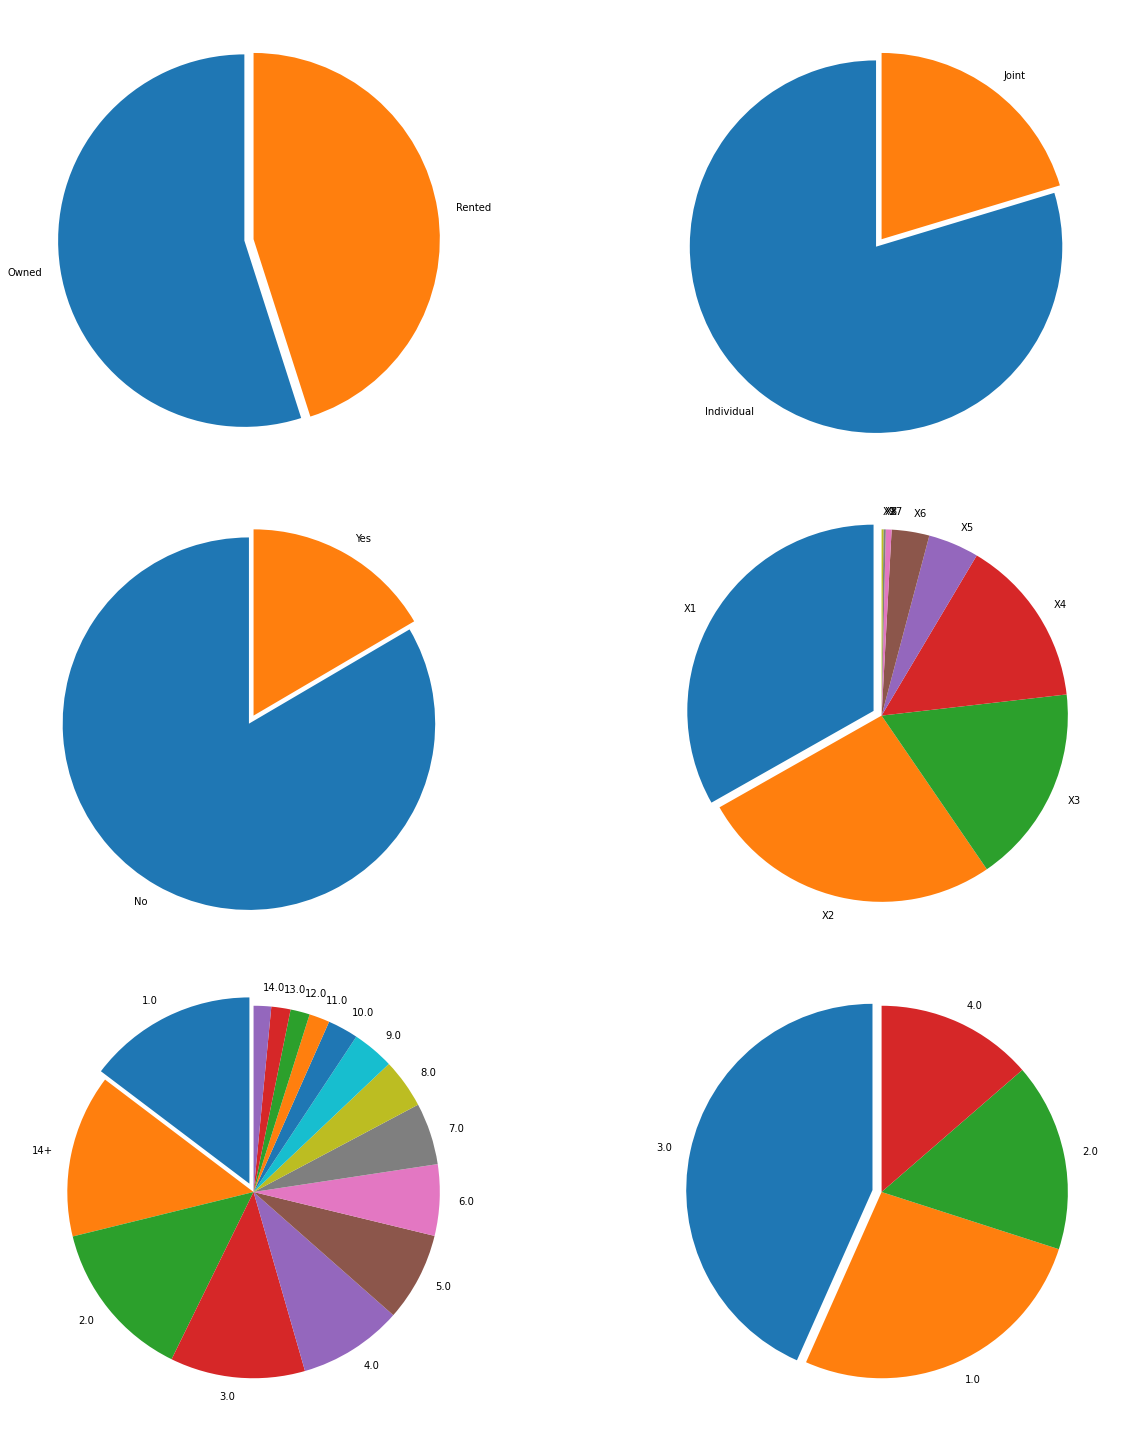

In [86]:
fig, ax = plt.subplots(3,2,figsize=(20,20))
ax = ax.flatten()
for i, cat in enumerate(var):
    cnt = df[cat].value_counts()
    ax[i].pie(cnt,labels=cnt.index, startangle=90, explode=[0.05]+ [0]*(len(cnt.index)-1))

plt.tight_layout()

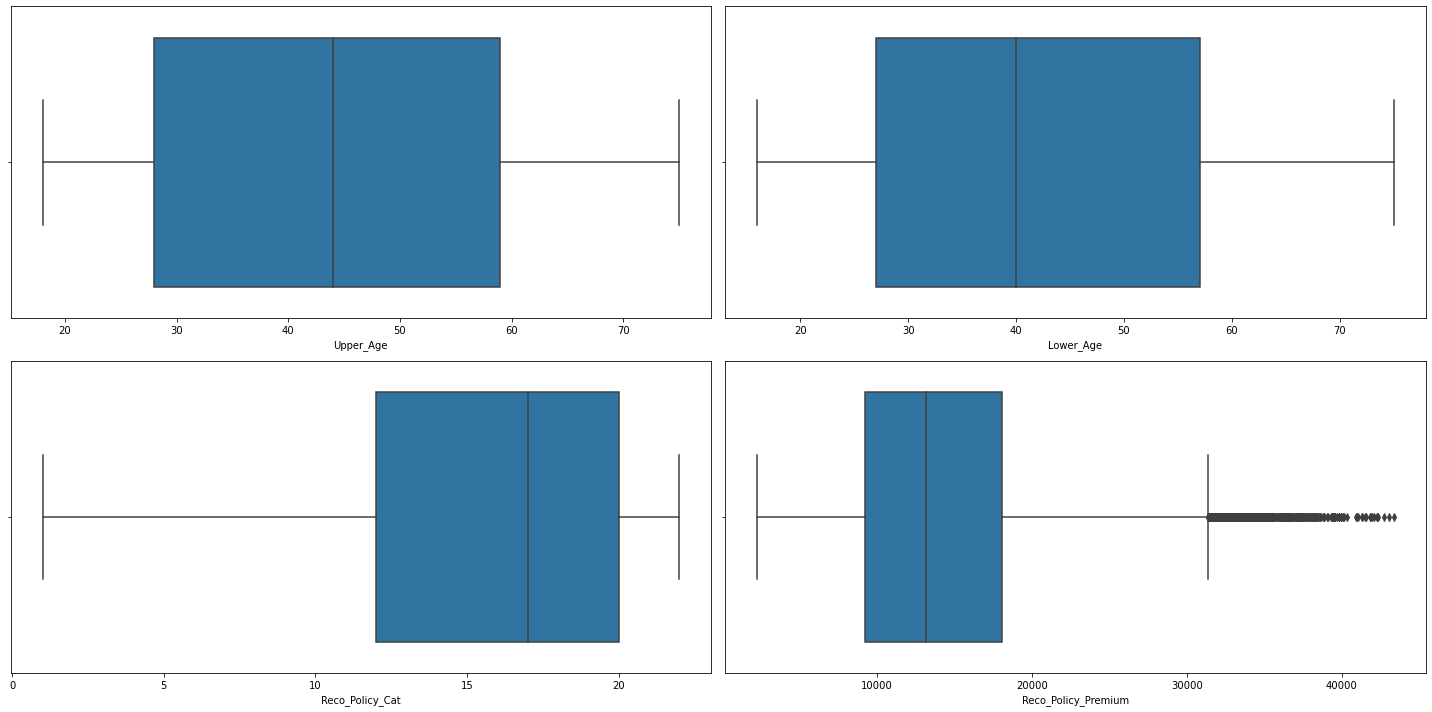

In [6]:
var = ['Upper_Age','Lower_Age','Reco_Policy_Cat','Reco_Policy_Premium']

fig, ax = plt.subplots(2,2,figsize=(20,10))
ax=ax.flatten()

for i , ele in enumerate(var):
    sns.boxplot(x=ele, data= df, ax= ax[i])
    
plt.tight_layout()
    
    

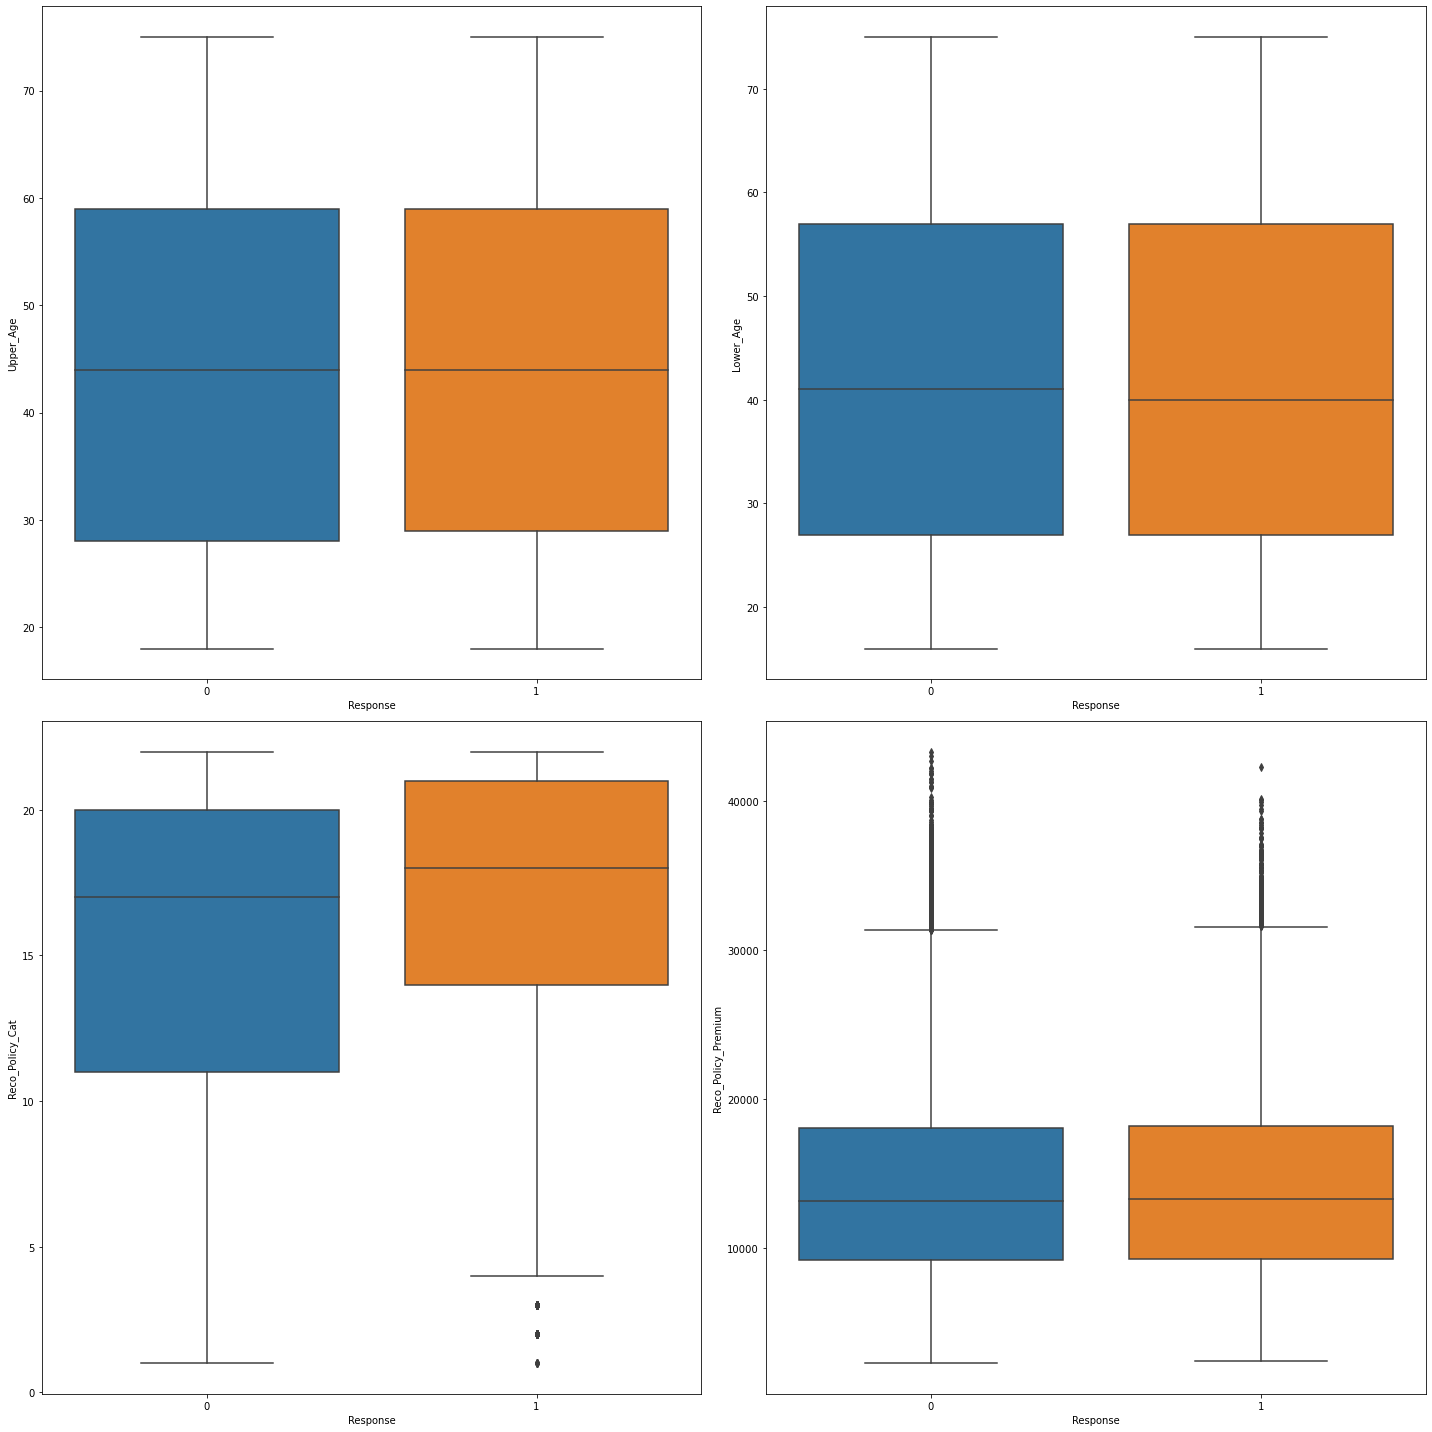

In [9]:
var = ['Upper_Age','Lower_Age','Reco_Policy_Cat','Reco_Policy_Premium']

fig, ax = plt.subplots(2,2,figsize=(20,20))
ax=ax.flatten()

for i , ele in enumerate(var):
    sns.boxplot(y=ele,x='Response', data= df, ax= ax[i])
    
plt.tight_layout()
    

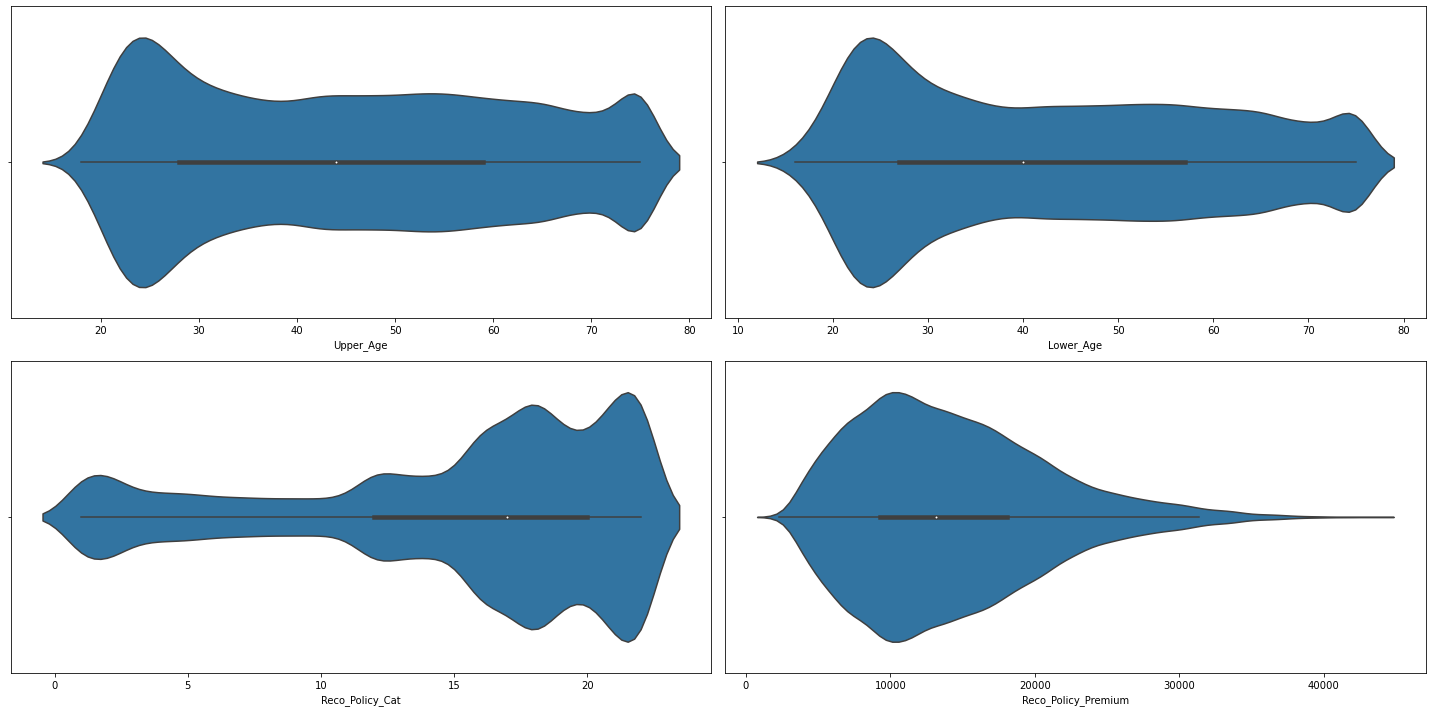

In [10]:
var = ['Upper_Age','Lower_Age','Reco_Policy_Cat','Reco_Policy_Premium']

fig, ax = plt.subplots(2,2,figsize=(20,10))
ax=ax.flatten()

for i , ele in enumerate(var):
    sns.violinplot(x=ele, data= df, ax= ax[i])
    
plt.tight_layout()
    

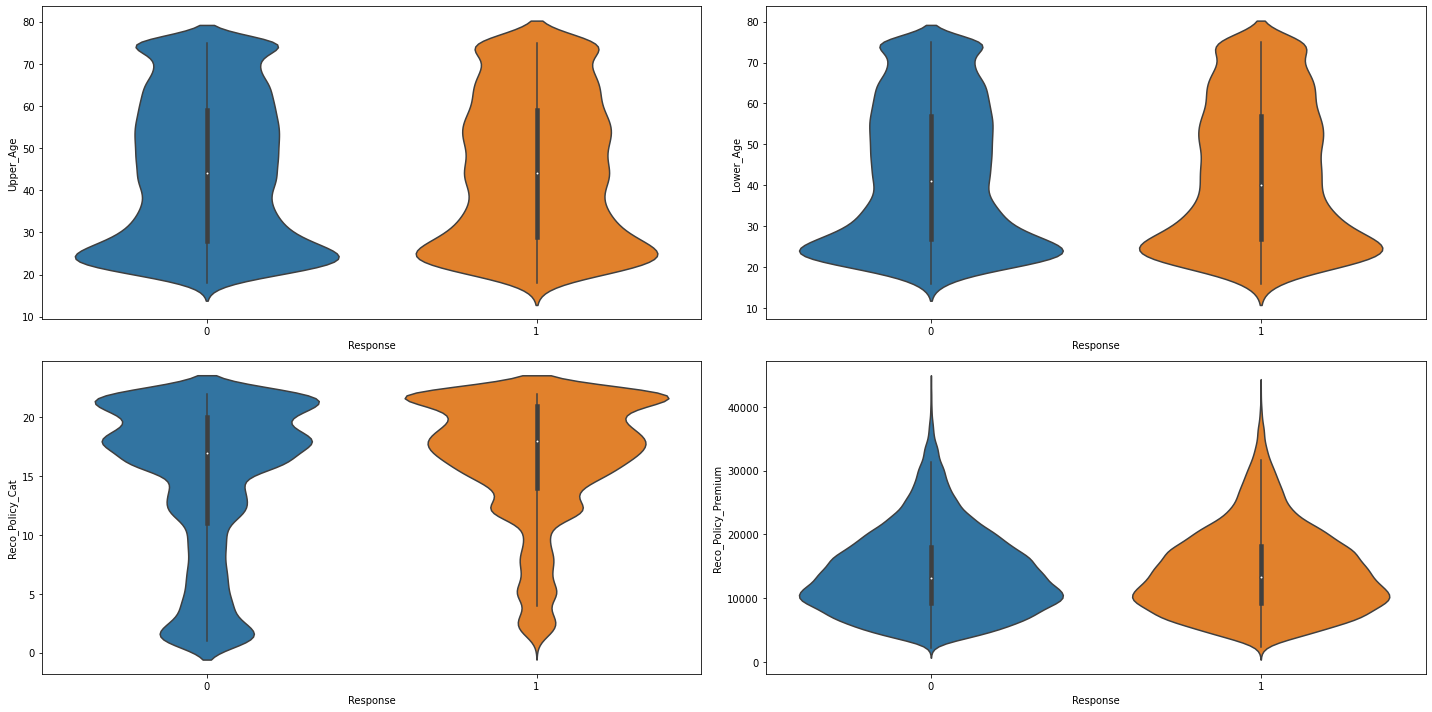

In [3]:
var = ['Upper_Age','Lower_Age','Reco_Policy_Cat','Reco_Policy_Premium']

fig, ax = plt.subplots(2,2,figsize=(20,10))
ax=ax.flatten()

for i , ele in enumerate(var):
    sns.violinplot(y=ele, x ='Response', data= df, ax= ax[i])
    
plt.tight_layout()
    

<AxesSubplot:xlabel='Upper_Age', ylabel='Reco_Policy_Premium'>

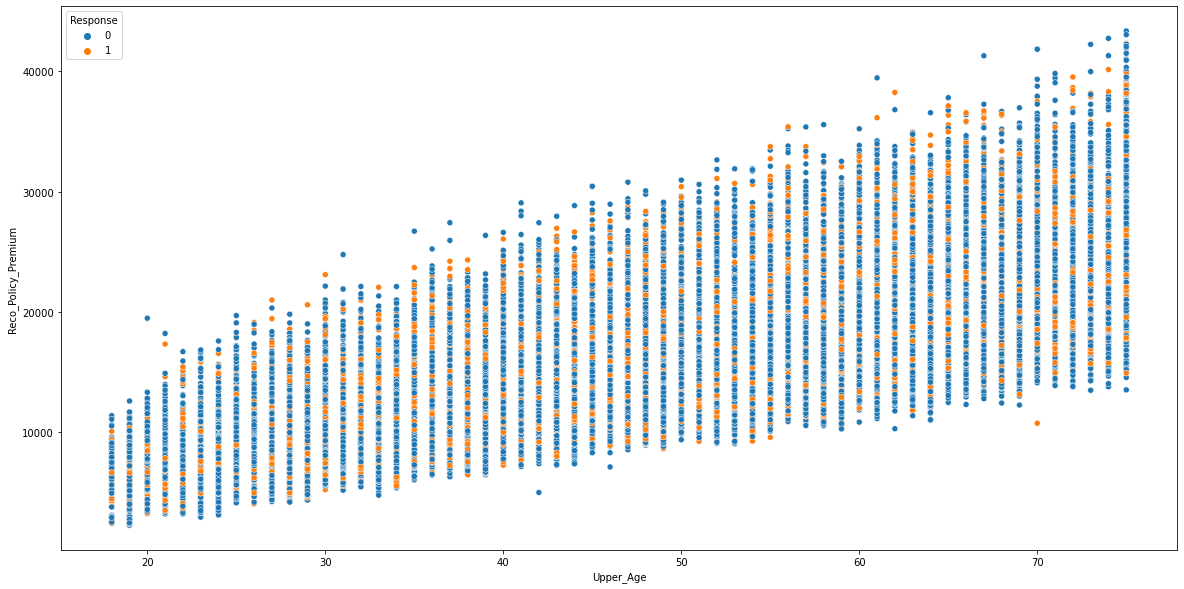

In [10]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Upper_Age',y='Reco_Policy_Premium', hue='Response', data=df)

In [18]:
df.isnull().sum().sort_values(ascending=False)

Health Indicator           7083
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Holding_Policy_Duration       0
Holding_Policy_Type           0
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

In [3]:
df.drop(columns=['Holding_Policy_Duration'],inplace=True)

In [4]:
df.drop(columns=['ID','City_Code','Region_Code'],inplace=True)

In [5]:
df.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,3.0,22,11628.0,0
1,Owned,Joint,75,22,No,X2,NaN,22,30510.0,0
2,Owned,Individual,32,32,No,NaN,1.0,19,7450.0,1
3,Owned,Joint,52,48,No,X1,3.0,19,17780.0,0
4,Rented,Individual,44,44,No,X2,1.0,16,10404.0,0


<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

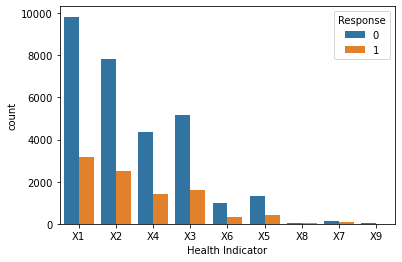

In [27]:
sns.countplot(x='Health Indicator', hue ='Response', data=df)

In [6]:
df['Health Indicator'].fillna('X1', inplace=True)

In [7]:
df.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,3.0,22,11628.0,0
1,Owned,Joint,75,22,No,X2,NaN,22,30510.0,0
2,Owned,Individual,32,32,No,X1,1.0,19,7450.0,1
3,Owned,Joint,52,48,No,X1,3.0,19,17780.0,0
4,Rented,Individual,44,44,No,X2,1.0,16,10404.0,0


<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

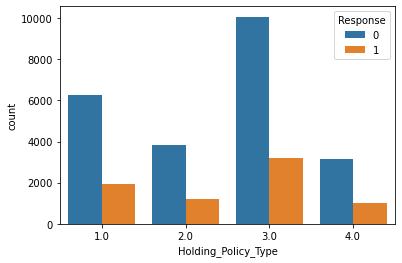

In [33]:
sns.countplot(x='Holding_Policy_Type', hue ='Response', data=df)

In [8]:
df['Holding_Policy_Type'].fillna(3.0, inplace=True)

In [9]:
df.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,3.0,22,11628.0,0
1,Owned,Joint,75,22,No,X2,3.0,22,30510.0,0
2,Owned,Individual,32,32,No,X1,1.0,19,7450.0,1
3,Owned,Joint,52,48,No,X1,3.0,19,17780.0,0
4,Rented,Individual,44,44,No,X2,1.0,16,10404.0,0


In [10]:
for col in df.select_dtypes(include='object').columns:
    print (f'{col}: {df[col].unique()}')

Accomodation_Type: ['Rented' 'Owned']
Reco_Insurance_Type: ['Individual' 'Joint']
Is_Spouse: ['No' 'Yes']
Health Indicator: ['X1' 'X2' 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']


In [11]:
from sklearn import preprocessing

In [12]:
for col in df.select_dtypes(include='object').columns:
    l_encoder=preprocessing.LabelEncoder()
    df[col]=l_encoder.fit_transform(df[col])
    print (f'{col}: {df[col].unique()}')

Accomodation_Type: [1 0]
Reco_Insurance_Type: [0 1]
Is_Spouse: [0 1]
Health Indicator: [0 1 3 2 5 4 7 6 8]


<AxesSubplot:>

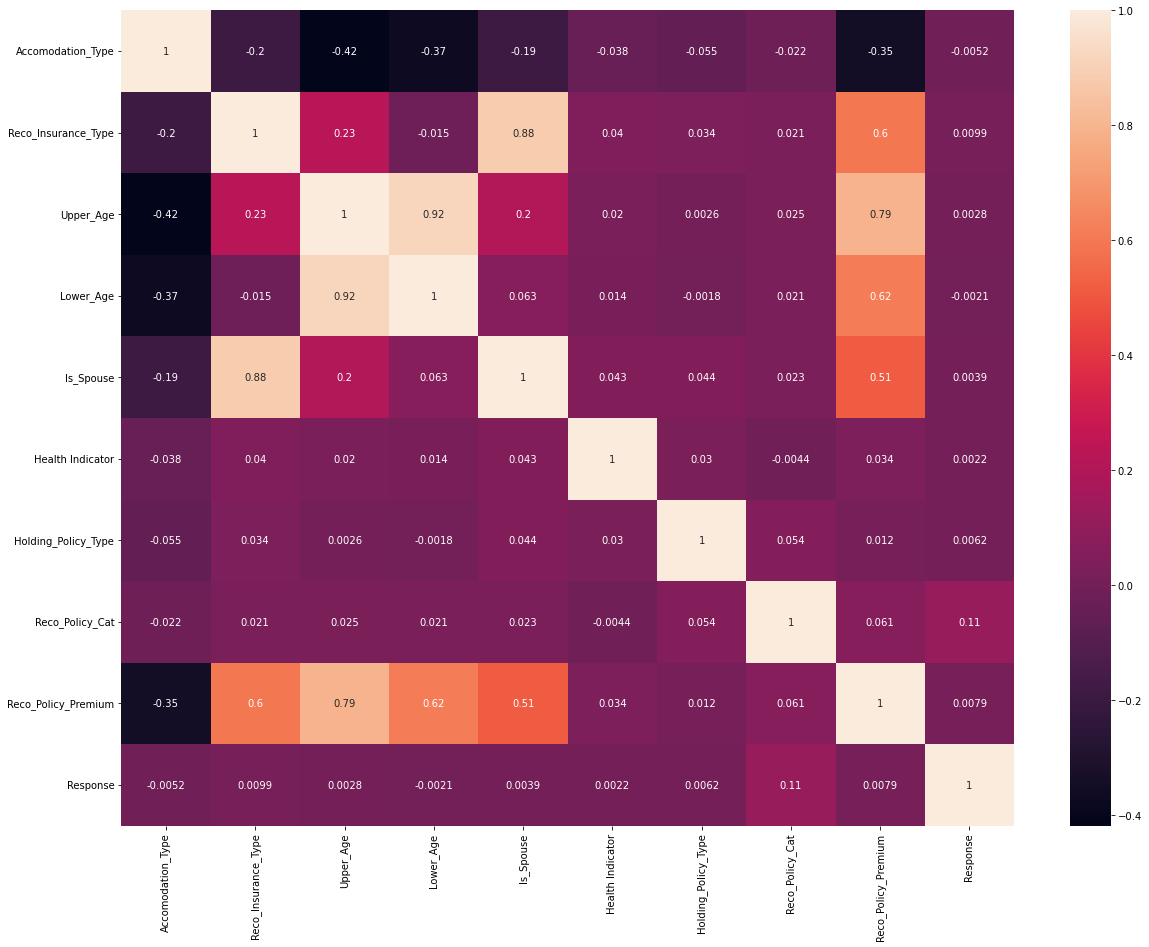

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='0.2g')

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
from sklearn.model_selection import train_test_split

In [15]:
X= df.drop('Response', axis=1)
y = df['Response']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:xlabel='Reco_Policy_Premium'>

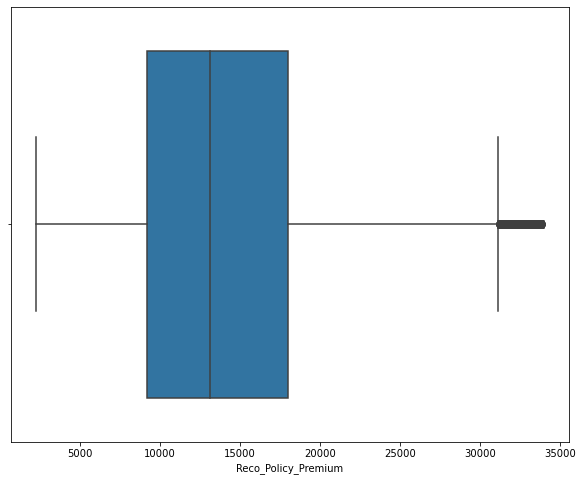

In [60]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Reco_Policy_Premium', data=df)

<AxesSubplot:xlabel='Reco_Policy_Premium'>

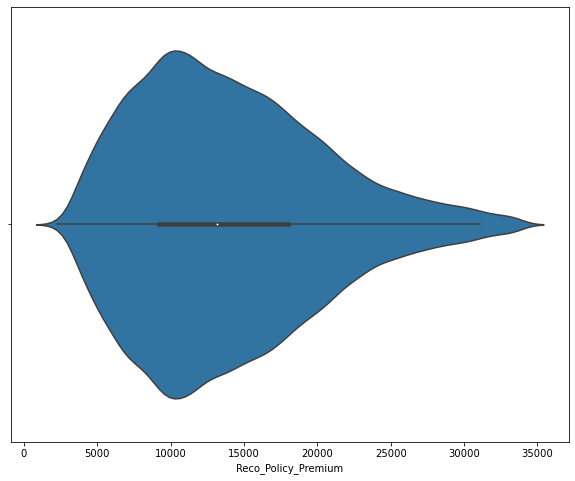

In [61]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'Reco_Policy_Premium', data=df)

In [16]:
from scipy import stats

In [17]:
z_score = np.abs(stats.zscore(df['Reco_Policy_Premium']))

In [18]:
outlier_indices = np.where(z_score>3)[0]

In [19]:
df.drop(df.index[outlier_indices], inplace=True)

In [20]:
X= df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [65]:
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth':[3,4,5,6,7,8,9],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[2,3,4],
    'random_state':[0,42,70]
}
grid_search = GridSearchCV(dtree,param_grid,cv=5)

In [66]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42, 70]})

In [67]:
print(grid_search.best_params_)

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [68]:
dtree1 = DecisionTreeClassifier(random_state=0,min_samples_leaf=2,min_samples_split=2,max_depth=9)
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, random_state=0)

In [69]:
y_pred = dtree1.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      7657
           1       0.33      0.01      0.02      2425

    accuracy                           0.76     10082
   macro avg       0.54      0.50      0.44     10082
weighted avg       0.66      0.76      0.66     10082



[[7601   56]
 [2398   27]]


In [76]:
y_predOnTrain = dtree1.predict(X_train)

In [77]:
print(classification_report(y_train,y_predOnTrain))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     30647
           1       0.76      0.02      0.05      9677

    accuracy                           0.76     40324
   macro avg       0.76      0.51      0.46     40324
weighted avg       0.76      0.76      0.67     40324



In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test,y_pred)

0.7565959135092244

In [82]:
imp_df= pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':dtree1.feature_importances_
})

f1 = imp_df.sort_values(by='Importance',ascending = False)

In [83]:
f1

,Feature,Importance
7,Reco_Policy_Cat,0.548907
8,Reco_Policy_Premium,0.129741
6,Holding_Policy_Type,0.097398
2,Upper_Age,0.090164
3,Lower_Age,0.069095
5,Health Indicator,0.036994
0,Accomodation_Type,0.024352
4,Is_Spouse,0.002518
1,Reco_Insurance_Type,0.000831


<AxesSubplot:xlabel='Importance', ylabel='Feature'>

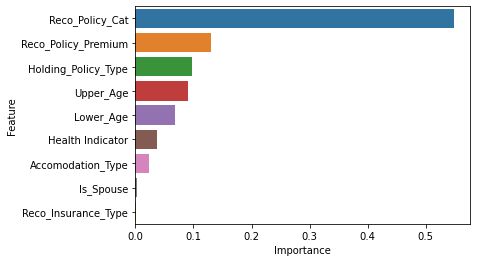

In [85]:
sns.barplot(x='Importance',y='Feature', data=f1)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='log2', n_estimators=100,class_weight='balanced')
# param_grid={
#     'n_estimators':[100,200],
#     'max_depth':[None,2,10],
#     'random_state':[0,42],
#     'max_features': ['sqrt','log2',None]
    
# }
# grid_search = GridSearchCV(rfc,param_grid,cv=5)
# grid_search.fit(X_train,y_train)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=0)

In [31]:
y_pred = rfc.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:

print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      7657
           1       0.34      0.13      0.18      2425

    accuracy                           0.73     10082
   macro avg       0.55      0.52      0.51     10082
weighted avg       0.67      0.73      0.68     10082



[[7048  609]
 [2116  309]]


In [32]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      7657
           1       0.34      0.12      0.18      2425

    accuracy                           0.73     10082
   macro avg       0.55      0.52      0.51     10082
weighted avg       0.66      0.73      0.68     10082



[[7070  587]
 [2129  296]]


In [34]:
rfc = RandomForestClassifier(random_state=0, max_features='log2', n_estimators=300,class_weight='balanced')
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=300, random_state=0)

In [35]:
y_pred = rfc.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      7657
           1       0.34      0.12      0.18      2425

    accuracy                           0.73     10082
   macro avg       0.55      0.52      0.51     10082
weighted avg       0.67      0.73      0.68     10082



[[7071  586]
 [2124  301]]


In [148]:
import requests as req
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [173]:
url = 'https://www.estesparkweather.net/archive_reports.php?date=201202'
res = req.get(url)

In [174]:
soup = BeautifulSoup(res.content, features='html.parser')

In [175]:
table = soup.find_all('table')

In [176]:
table

[<table border="0" cellpadding="3" cellspacing="0">
 <tr class="table-top">
 <td colspan="2">Average and Extremes for Month of February 2012 up to day 0</td>
 </tr>
 <tr class="column-light">
 <td>Average temperature</td><td> 27.2°F</td>
 </tr>
 <tr class="column-dark">
 <td>Average humidity</td><td> 42%</td>
 </tr>
 <tr class="column-light">
 <td>Average dewpoint</td><td> 5.6°F</td>
 </tr>
 <tr class="column-dark">
 <td>Average barometer</td><td> 29.909 in.</td>
 </tr>
 <tr class="column-light">
 <td>Average windspeed</td><td> 10.9 mph</td>
 </tr>
 <tr class="column-dark">
 <td>Average gustspeed</td><td> 16.3 mph</td>
 </tr>
 <tr class="column-light">
 <td>Average direction</td><td> 246° (WSW)</td>
 </tr>
 <tr class="column-dark">
 <td>Rainfall for month</td><td> 0.343 in.</td>
 </tr>
 <tr class="column-light">
 <td>Rainfall for year</td><td> 0.382 in.</td>
 </tr>
 <tr class="column-dark">
 <td>Maximum rain per minute</td><td> 0.010 in on day 23 at time 11:57</td>
 </tr>
 <tr class="c

In [177]:
t = [row.text.splitlines() for row in table]

In [178]:
t = t[:-9]

In [179]:
t

[]

In [87]:
parse_data = [t[i][2::3] for i in range(len(t))]

In [125]:
type(parse_data)

list

In [149]:
import re

In [223]:
re.findall(r"[\d]*[.]*[\d]+",parse_data[0][-2])[0]

'24.2'

In [218]:
parse_num = [[re.search(r'[\d]*[.]*[\d]+',parse_data[i][j])[0] for j in range(len(parse_data[i]))] for i in range(len(parse_data))]

In [224]:
parse_num1 = [[re.findall(r'[\d]*[.]*[\d]+',parse_data[i][j])[0] for j in range(len(parse_data[i]))] for i in range(len(parse_data))]

In [226]:
parse_num1[0]

['1',
 '56.7',
 '42',
 '32.4',
 '29.7',
 '3.8',
 '5.6',
 '286',
 '0.00',
 '6.01',
 '0.00',
 '70.9',
 '40.1',
 '77',
 '21',
 '29.991',
 '29.362',
 '17.3',
 '24.2',
 '75.0']

In [225]:
parse_num[0]

['1',
 '56.7',
 '42',
 '32.4',
 '29.7',
 '3.8',
 '5.6',
 '286',
 '0.00',
 '6.01',
 '0.00',
 '70.9',
 '40.1',
 '77',
 '21',
 '29.991',
 '29.362',
 '17.3',
 '24.2',
 '75.0']

In [129]:
len(parse_num[0])

20

In [130]:
index = ['200901'+ row[0] for row in parse_num ]

In [132]:
# index

In [133]:
parse_field = [row[1:] for row in parse_num ]

In [135]:
# parse_field

In [136]:
col =  ['Average temperature (°F)', 'Average humidity (%)',
 'Average dewpoint (°F)', 'Average barometer (in)',
 'Average windspeed (mph)', 'Average gustspeed (mph)',
 'Average direction (°deg)', 'Rainfall for month (in)',
 'Rainfall for year (in)', 'Maximum rain per minute',
 'Maximum temperature (°F)', 'Minimum temperature (°F)',
 'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure',
 'Minimum pressure', 'Maximum windspeed (mph)',
 'Maximum gust speed (mph)', 'Maximum heat index (°F)']

In [137]:
df = pd.DataFrame(parse_field, index=index, columns=col)

In [138]:
df.head()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
2009011,37.8,35,12.7,29.7,26.4,36.8,274,0.00,0.00,0.00,40.1,34.5,44,27,29.762,29.596,41.4,59,40.1
2009012,43.2,32,14.7,29.5,12.8,18.0,240,0.00,0.00,0.00,52.8,37.5,43,16,29.669,29.268,35.7,51,52.8
2009013,25.7,60,12.7,29.7,8.3,12.2,290,0.00,0.00,0.00,41.2,6.7,89,35,30.232,29.260,25.3,38,41.2
2009014,9.3,67,0.1,30.4,2.9,4.5,47,0.00,0.00,0.00,19.4,0.0,79,35,30.566,30.227,12.7,20,32.0
2009015,23.5,30,5.3,29.9,16.7,23.1,265,0.00,0.00,0.00,30.3,15.1,56,13,30.233,29.568,38.0,53,32.0


In [217]:
ind = []
data = []
cnt = 0
for k in range(len(d)):
    url = 'https://www.estesparkweather.net/archive_reports.php?date='+d[k]
    res = req.get(url)
    soup = BeautifulSoup(res.content, features='html.parser')
    table = soup.find_all('table')
    t = [row.text.splitlines() for row in table]
    t = t[:-9]
    parse_data = [t[i][2::3] for i in range(len(t))]
    parse_num = [[re.search(r'[\d]*[.]*[\d]+',parse_data[i][j])[0] for j in range(len(parse_data[i]))]\
                    for i in range(len(parse_data))]
    for j in range(len(parse_num)):
        ind.append(d[k]+parse_num[j][0]) 
        data.append(parse_num[j][1:])
    cnt+=1
    print("!",end="")
for i in data:
    if len(i)>19:
        print(len(i))
        data.remove(i)
for i in ind:
    if len(i)>8:
        print(len(i))
        ind.remove(i)
df1 = pd.DataFrame(data, index=ind, columns=col)
df2 = df1.reset_index().copy()
df2.rename(columns={'index':'Day'}, inplace=True)
df2['Day'] = pd.to_datetime(df2['Day'], format='%Y%m%d')
df2.to_csv('weather1.csv', index=False)
df2.head()

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!21
21
21
21
21
21
21
21
10
10
10
10
10
10
10
10


,Day,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
0,2009-01-01,37.8,35,12.7,29.7,26.4,36.8,274,0.00,0.00,0.00,40.1,34.5,44,27,29.762,29.596,41.4,59,40.1
1,2009-01-02,43.2,32,14.7,29.5,12.8,18.0,240,0.00,0.00,0.00,52.8,37.5,43,16,29.669,29.268,35.7,51,52.8
2,2009-01-03,25.7,60,12.7,29.7,8.3,12.2,290,0.00,0.00,0.00,41.2,6.7,89,35,30.232,29.260,25.3,38,41.2
3,2009-01-04,9.3,67,0.1,30.4,2.9,4.5,47,0.00,0.00,0.00,19.4,0.0,79,35,30.566,30.227,12.7,20,32.0
4,2009-01-05,23.5,30,5.3,29.9,16.7,23.1,265,0.00,0.00,0.00,30.3,15.1,56,13,30.233,29.568,38.0,53,32.0


In [140]:
d = pd.period_range(start='200901', end='201810', freq='M')

In [143]:
d = d.strftime("%Y%m")

In [144]:
d[0]

'200901'

## ind

In [210]:
# for i in range(len(ind)):
#     if len(ind[i])==8:
#         print(i,len(ind[i]))

In [180]:
for i in range(len(data)):
    if len(data[i])>19:
        print(i,len(data[i]))

692 21
943 21
1281 21
1602 21
1960 21
2312 21
2679 21
3016 21


In [167]:
len(data[692])

21

In [190]:
len(ind), len(data)

(3291, 3291)

In [196]:
len(ind), len(data)

(3283, 3283)

In [195]:
for i in data:
    if len(i)>19:
        print(len(i))
        data.remove(i)

In [192]:
for i in ind:
    if len(i)>8:
        print(len(i))
        ind.remove(i)

In [197]:
df1 = pd.DataFrame(data, index=ind, columns=col)

In [199]:
df2 = df1.reset_index().copy()

In [203]:
df2.rename(columns={'index':'Day'}, inplace=True)

In [205]:
df2['Day'] = pd.to_datetime(df2['Day'], format='%Y%m%d')

In [206]:
df2.head()

,Day,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
0,2009-01-01,37.8,35,12.7,29.7,26.4,36.8,274,0.00,0.00,0.00,40.1,34.5,44,27,29.762,29.596,41.4,59,40.1
1,2009-01-02,43.2,32,14.7,29.5,12.8,18.0,240,0.00,0.00,0.00,52.8,37.5,43,16,29.669,29.268,35.7,51,52.8
2,2009-01-03,25.7,60,12.7,29.7,8.3,12.2,290,0.00,0.00,0.00,41.2,6.7,89,35,30.232,29.260,25.3,38,41.2
3,2009-01-04,9.3,67,0.1,30.4,2.9,4.5,47,0.00,0.00,0.00,19.4,0.0,79,35,30.566,30.227,12.7,20,32.0
4,2009-01-05,23.5,30,5.3,29.9,16.7,23.1,265,0.00,0.00,0.00,30.3,15.1,56,13,30.233,29.568,38.0,53,32.0


In [207]:
df1.head()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
2009011,37.8,35,12.7,29.7,26.4,36.8,274,0.00,0.00,0.00,40.1,34.5,44,27,29.762,29.596,41.4,59,40.1
2009012,43.2,32,14.7,29.5,12.8,18.0,240,0.00,0.00,0.00,52.8,37.5,43,16,29.669,29.268,35.7,51,52.8
2009013,25.7,60,12.7,29.7,8.3,12.2,290,0.00,0.00,0.00,41.2,6.7,89,35,30.232,29.260,25.3,38,41.2
2009014,9.3,67,0.1,30.4,2.9,4.5,47,0.00,0.00,0.00,19.4,0.0,79,35,30.566,30.227,12.7,20,32.0
2009015,23.5,30,5.3,29.9,16.7,23.1,265,0.00,0.00,0.00,30.3,15.1,56,13,30.233,29.568,38.0,53,32.0


In [209]:
df2.to_csv('weather1.csv', index=False)

In [211]:
df3 = pd.read_csv('weather1.csv')

In [214]:
df3[:-3].tail()

,Day,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
3275,2018-10-24,45.9,53,27.5,29.8,2.7,4.6,282,0.85,6.86,0.0,57.3,35.9,81,23,29.947,29.710,12.7,19.6,57.2
3276,2018-10-25,46.7,40,22.7,29.8,4.5,7.2,283,0.85,6.86,0.0,61.8,35.0,60,19,29.933,29.682,13.8,19.6,61.8
3277,2018-10-26,48.4,35,21.6,29.8,9.7,14.4,283,0.85,6.86,0.0,58.7,42.6,48,19,29.979,29.759,20.7,31.1,58.7
3278,2018-10-27,53.3,37,26.6,29.8,10.3,14.8,282,0.85,6.86,0.0,64.5,38.3,78,24,29.935,29.650,28.8,38.0,64.5
3279,2018-10-28,49.4,48,25.2,29.9,5.3,7.6,282,0.85,6.86,0.0,67.3,30.9,90,19,30.040,29.663,18.4,25.3,67.3


In [227]:
ind = pd.Series(ind)

In [230]:
ind.head()

0    2009011
1    2009012
2    2009013
3    2009014
4    2009015
dtype: object

In [233]:
ind2 = pd.to_datetime(ind, format='%Y%m%d').copy()

In [234]:
ind2

0      2009-01-01
1      2009-01-02
2      2009-01-03
3      2009-01-04
4      2009-01-05
          ...    
3278   2018-10-27
3279   2018-10-28
3280   2018-10-29
3281   2018-10-30
3282   2018-10-31
Length: 3283, dtype: datetime64[ns]

In [ ]:
#### Start you code here, you are free to add any number of cells
d = pd.period_range(start='200901', end='201810', freq='M')
d = d.strftime("%Y%m")
ind = []
data = []
cnt = 0
for k in range(len(d)):
    url = 'https://www.estesparkweather.net/archive_reports.php?date='+d[k]
    res = req.get(url)
    soup = BeautifulSoup(res.content, features='html.parser')
    table = soup.find_all('table')
    t = [row.text.splitlines() for row in table]
    t = t[:-9]
    parse_data = [t[i][2::3] for i in range(len(t))]
    parse_num = [[re.findall(r'[\d]*[.]*[\d]+',parse_data[i][j])[0] for j in range(len(parse_data[i]))]for i in range(len(parse_data))]
    for j in range(len(parse_num)):
        ind.append(d[k]+parse_num[j][0]) 
        data.append(parse_num[j][1:])
    cnt+=1
    print("!",end="")
for i in data:
    if len(i)>19:
        print(len(i))
        data.remove(i)
for i in ind:
    if len(i)>8:
        print(len(i))
        ind.remove(i)

ind = pd.Series(ind)
ind_f = pd.to_datetime(ind, format='%Y%m%d')
df = pd.DataFrame(data, index=ind_f, columns=col)
df1 = df[:-3].copy()
df1

In [235]:
ind = pd.Series(ind)
ind_f = pd.to_datetime(ind, format='%Y%m%d')
df = pd.DataFrame(data, index=ind_f, columns=col)
df1 = df[:-3].copy()

In [236]:
df1.to_csv('weather2.csv')